# Mapping the $B_1^+$ field

In [1]:
# Import all python libraries and functions used in this notebook
import matplotlib.pyplot as plt
import numpy as np

from functions import montage

In order to produce the MR signal used to reconstruct an image, we use electromagnetic elements to produce the $B_1$ magnetic field that tilts the spins out of their equilibrium position along $B_0$. To efficiently tilt the spins in the transverse plane, $B_1$ must oscillate at the Larmor Frequency of these spins, which depends on their gyromagnetic ratio $\gamma$ and the $B_0$ field strength. While returning to their equilibrium position (relaxation), the spins emit the measured MR signal which also oscillates at the Larmor Frequency.

Every transmit (Tx) element produces its own radio-frequency (RF) field, which can be seen as a complex spatial distribution (it has a **magnitude** and a **phase**).

The RF magnetic field produced by the Tx elements is commonly referred to as the $B_1^+$ field. In opposition, the $B_1^-$ field is the RF magnetic field produced back by the excited protons in the body that will be measured by the receive (Rx) elements.

Usually, the $B_1^+$ magnitude will be stronger near the corresponding transmit elements and progressively decrease as we get further away. But when we use several Tx elements simultaneously, the complex RF fields produced by the different Tx elements interfere with each other, resulting in a total $B_1^+$ distribution that won't necessarily be stronger near the Tx elements.

In this Jupyter book, we present different methods that can be used to control the $B_1^+$ distribution during MRI experiments. The first step to do so is to measure the individual $B_1^+$ fields produced by the different Tx elements. This process is known as **$B_1^+$ mapping**.

The in-vivo $B_1^+$ data shown below come from [Parallel Transmission RF Shimming GUI](https://cai2r.net/resources/parallel-transmission-rf-shimming-gui/)$^{[1]}$ and correspond to a single slice $B_1^+$ mapping performed on each element of an 8-channels 7T head-coil.

[1] Deniz et al. 2013. "Maximum efficiency radiofrequency shimming: Theory and initial application for hip imaging at 7 tesla." 

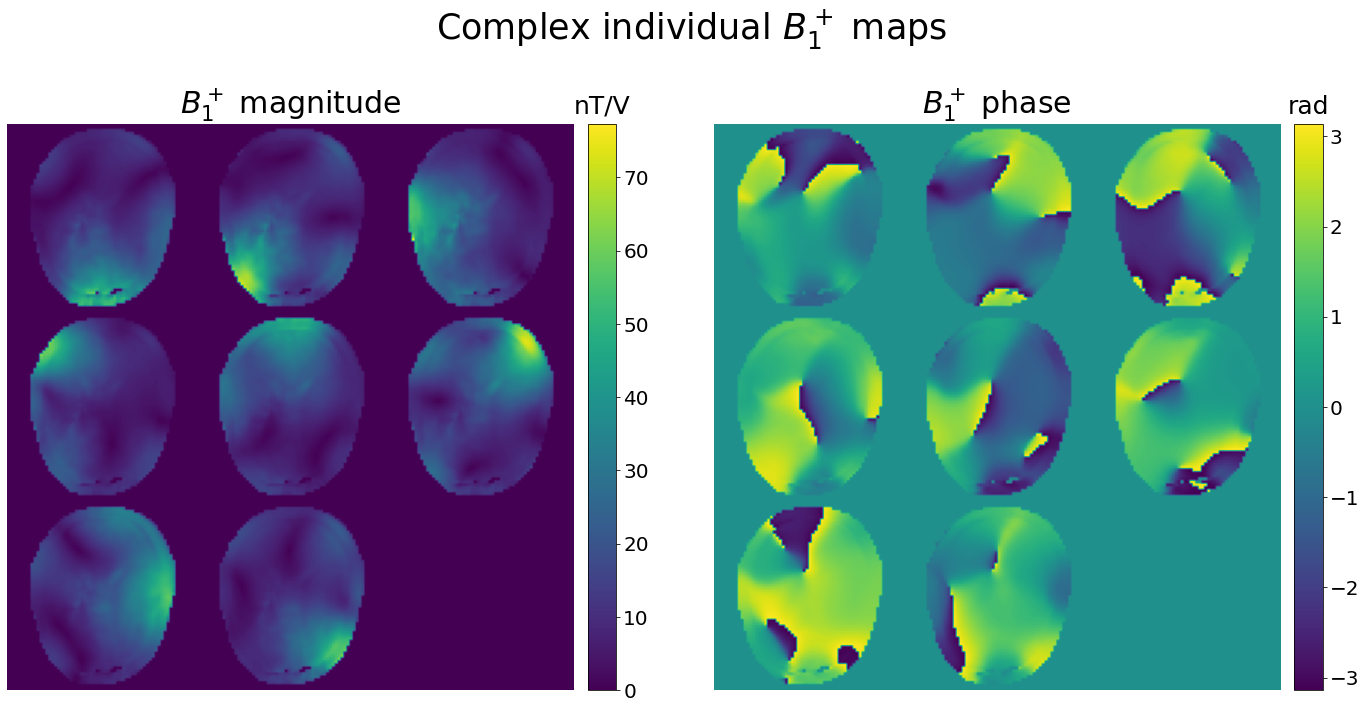

In [2]:
# Load the data
b1_maps = np.load('./data/b1_maps.npy') # Complex 2D B1 maps of each element (x, y, n_coils)

plt.figure(figsize=[20, 10])
plt.suptitle("Complex individual $B_1^+$ maps", fontsize=35)
plt.subplot(121)
montage(np.abs(b1_maps), colormap='viridis') # Show the B1 magnitudes of the individual coils
plt.title('$B_1^+$ magnitude', fontsize=30)
cbar = plt.colorbar(pad=0.02)
cbar.ax.set_title('nT/V', fontsize=25, pad=10)
cbar.ax.tick_params(labelsize=20)

plt.subplot(122)
montage(np.angle(b1_maps), colormap='viridis') # Show the B1 phases of the individual coils
plt.title('$B_1^+$ phase', fontsize=30)
cbar = plt.colorbar(pad=0.02)
cbar.ax.set_title('rad', fontsize=25, pad=10)
cbar.ax.tick_params(labelsize=20)
plt.tight_layout(rect=(0, 0, 1, 0.95))

By looking at the "hotspots" on the magnitude images (the bright yellow-green areas), we can observe that the Tx elements are regularly placed all around the patient's head in order to achieve circular polarization excitation.

```{note}
Both magnitude and phase values are essential for $B_1^+$ shimming applications, as the total $B_1^+$ field produced by a RF coil is the complex sum of all its individual Tx $B_1^+$ fields.
```